<h1 style="text-align:center">Mid-Term 1</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations<br>Spring 2018</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
# Import the ODE solver
from scipy.integrate import odeint

### Problem 1
The system in Figure 1 is a simple model of a foot pedal that consists of point mass $m$ attached to the end of a massless, inextensible link of total length $l$. The rod is attached to a perfect, frictionless pin a distance $l_1$ from its upper end. To that upper end is attached a spring with spring constant $k$ and damper with damping coefficient $c$, which are both also attached to ground. The spring is at equilibrium when $\theta = 0$.

<ol style="list-style-type: lower-alpha;">
<li> Write the equations of motion for this system. You should include the effects of gravity.</li>
<li> Assuming small angles about a $\theta_{eq} = 0$ equilibrium, write the linearized equations of motion.</li>
<li> What is the natural frequency?</li> 
<li> What is the natural frequency if gravity is ignored? Would this change effect the response? Explain why or why not.</li>
<li> What is the damping ratio?</li>
<li> Sketch the response, $\theta(t)$, to initial conditions:

  $$\theta(0) = \theta_0 \quad \mbox{and} \quad  \dot{\theta}(0) = 0$$

  for damping ratios of $\zeta = 0.0$, $\zeta = 0.2$, and $\zeta = 0.7$. Be sure to clearly label the axes and    differentiate between the responses.</li>
<li> Write the equation describing the response to the same initial conditions.</li>
</ol>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/FootPedal_Model.png" alt="The Pendulum-based Model of a Foot Pedal" width=35%/></a><br>
    <strong> Figure 1: The Pendulum-based Model of a Foot Pedal</strong>
</p>

#### Part d
We'll set up one system that includes gravity and one that does not. For our set of parameters, we'll compare the two, demonstrating the effects of ignoring gravity when generating the equations of motion.

We'll start by defining the system parameters.

In [4]:
# Define the system pararmeters
k = 2*(2*np.pi)**2            # Spring constant (N/m)
m = 1.0                       # main mass (kg)
l1 = 0.3                      # length (m)
l2 = 0.7                      # length (m)
g = 9.81                      # accel due to gravity (m/s^2)

Io = m * l2**2                # moment of interia of the mass about the pin

# Define natural frequencies including gravity and not including gravity
wn_grav = np.sqrt((k * l1**2 + m * g * l2)/Io)
wn_NOgrav = np.sqrt((k * l1**2)/Io)

# We'll define a damping ratio, then solve for the damping coefficeint
# that would result in it
z = 0.1

# Select c based on desired amping ratio
c_grav = 2 * z * wn_grav * (m * l2**2/l1**2)    # with gravity
c_NOgrav = 2 * z * wn_NOgrav * (m * l2**2/l1**2)  # without gravity

Now, we'll define two sets of equation of motion. One will be include gravity and the other will not.

In [5]:
# Define the equations of motion including gravity
def eq_of_motion_grav(w, t, p):
    """
    Defines the differential equations for the system including gravity.
    They are rewritten as a system of first order diff eq, as required by the solver.

    Arguments:
        w :  vector of the state variables:
        t :  time
        p :  vector of the parameters:
    """
    theta, theta_dot = w
    m, k, c_grav, c_NOgrav, l1, l2, g = p
    
    Io = m * l2**2 # moment of interia of the mass about the pin

    # Create sysODE = (x', x_dot')
    sysODE = [theta_dot,
              -(k * l1**2 + m * g * l2)/Io * theta - c_grav * l1**2 / Io * theta_dot]
    return sysODE


# Define the equations of motion ignoring gravity
def eq_of_motion_NOgrav(w, t, p):
    """
    Defines the differential equations for the system if we ignore gravity
    They are rewritten as a system of first order diff eq, as required by the solver.

    Arguments:
        w :  vector of the state variables:
        t :  time
        p :  vector of the parameters:
    """
    theta, theta_dot = w
    m, k, c_grav, c_NOgrav, l1, l2, g = p
    
    Io = m * l2**2 # moment of interia of the mass about the pin

    # Create sysODE = (x', x_dot')
    sysODE = [theta_dot,
              -(k * l1**2)/Io * theta - c_NOgrav * l1**2 / Io * theta_dot]
    return sysODE

Now, we need to set up the differential equation solver.

In [6]:
# Set up simulation parameters

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
theta_init = np.deg2rad(10.0)       # initial angle
theta_dot_init = 0.0                    # initial velocity

# Pack the parameters and initial conditions into arrays 
p = [m, k, c_grav, c_NOgrav, l1, l2, g]
x0 = [theta_init, theta_dot_init]

Now, we can call the solver, once for system including gravity and once for the system without. We'll then plot a comparison on the responses.

In [7]:
# Call the ODE solver for the case with gravity
resp_grav = odeint(eq_of_motion_grav, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

# Call the ODE solver for the case without gravity
resp_NOgrav = odeint(eq_of_motion_NOgrav, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

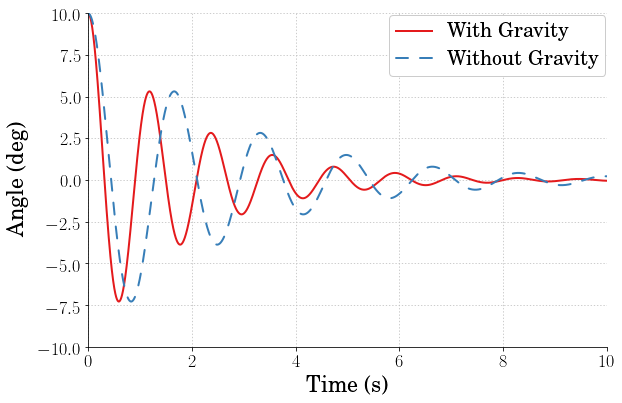

In [8]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Angle (deg)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, np.rad2deg(resp_grav[:,0]), linewidth=2, linestyle='-', label=r'With Gravity')
plt.plot(t, np.rad2deg(resp_NOgrav[:,0]), linewidth=2, linestyle='--', label=r'Without Gravity')

# uncomment below and set limits if needed
plt.xlim(0, 10)
plt.ylim(-10, 10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
plt.savefig('MCHE485_Prob1d.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

#### Part f
Here, we'll plot hte response for several values of damping ratio. We already have our equations of motion defined. We'll use the ones that include gravity.

In [9]:
# Define the system pararmeters
k = 2*(2*np.pi)**2            # Spring constant (N/m)
m = 1.0                       # main mass (kg)
l1 = 0.3                      # length (m)
l2 = 0.7                      # length (m)
g = 9.81                      # accel due to gravity (m/s^2)

Io = m * l2**2                # moment of interia of the mass about the pin

# Define natural frequencies including gravity and not including gravity
wn_grav = np.sqrt((k * l1**2 + m * g * l2)/Io)

# We'll define a damping ratio, then solve for the damping coefficeint
# that would result in it
z = 0.0
c_0p0 = 2 * z * wn_grav * (m * l2**2/l1**2)    # Select c based on desired amping ratio

z = 0.2
c_0p2 = 2 * z * wn_grav * (m * l2**2/l1**2)    # Select c based on desired amping ratio

z = 0.7
c_0p7 = 2 * z * wn_grav * (m * l2**2/l1**2)    # Select c based on desired amping ratio

Now, we'll set up the ode solver and simluate the response for each damping ratio. All that will change between the different cases is the value of the damping coefficient that we pass to the solver.

In [10]:
# Set up simulation parameters

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
theta_init = np.deg2rad(10.0)       # initial angle
theta_dot_init = 0.0                # initial velocity
x0 = [theta_init, theta_dot_init]   # pack the initial conditions into an array

First, we'll simulate the $\zeta=0.0$ case.

In [11]:
# Pack the parameters and initial conditions into arrays 
p = [m, k, c_0p0, c_NOgrav, l1, l2, g]

# Call the ODE solver for the case with gravity
resp_z0p0 = odeint(eq_of_motion_grav, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Now, we'll simulate the $\zeta=0.2$ case. All that changes in the array `p` that gets passed to the solver. 

In [12]:
# Pack the parameters and initial conditions into arrays 
p = [m, k, c_0p2, c_NOgrav, l1, l2, g]

# Call the ODE solver for the case with gravity
resp_z0p2 = odeint(eq_of_motion_grav, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Now, we'll simulate the $\zeta=0.7$ case. Again, all that changes in the array `p` that gets passed to the solver. 

In [13]:
# Pack the parameters and initial conditions into arrays 
p = [m, k, c_0p7, c_NOgrav, l1, l2, g]

# Call the ODE solver for the case with gravity
resp_z0p7 = odeint(eq_of_motion_grav, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

Now, we'll plot those three resposnes on the same set of axes.

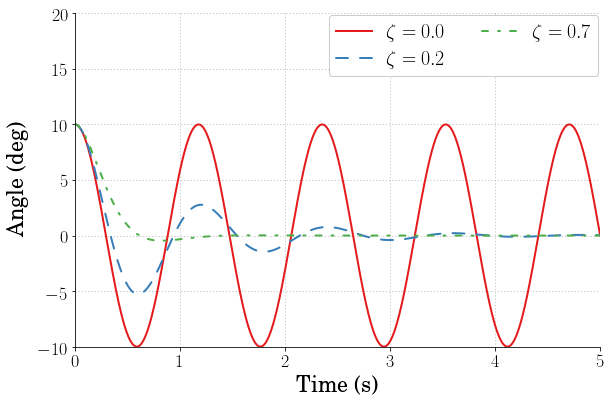

In [14]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Angle (deg)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, np.rad2deg(resp_z0p0[:,0]), linewidth=2, linestyle='-', label=r'$\zeta=0.0$')
plt.plot(t, np.rad2deg(resp_z0p2[:,0]), linewidth=2, linestyle='--', label=r'$\zeta=0.2$')
plt.plot(t, np.rad2deg(resp_z0p7[:,0]), linewidth=2, linestyle='-.', label=r'$\zeta=0.7$')

# uncomment below and set limits if needed
plt.xlim(0, 5)
plt.ylim(-10, 20)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
plt.savefig('MCHE485_Prob1f.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

## Problem 2
The system in Figure 2 consists of mass, $m$, connected to ground through a spring of spring constant $k$ and a damper of damping coefficient $c$. The system rests on an frictionless incline of angle $\theta$. A force, $f(t)$, acts on the mass.

<ol style="list-style-type: lower-alpha;">
<li> Write the equations of motion for this system.</li>
<li> What is the natural frequency?</li>
<li> What is the damping ratio?</li>
<li> Does the angle of the incline affect either of these parameters? Why or why not?</li>
<li> Assuming $f(t) = \bar{f}e^{i\omega t}$, write the transfer function from the amplitude of the torque, $\bar{f}$, to the amplitude of the response.</li>
<li> Sketch the approximate frequency response (both magnitude and phase) for $\zeta = 0.0$, $\zeta = 0.2$, and $\zeta = 0.7$. For each damping ratio, be sure to indicate:
	<ol style="list-style-type: lower-roman; margin-top:-2px">
			<li> Amplitude and phase as $\omega$ approaches 0.</li>
			<li> Amplitude and phase as $\omega$ approaches infinity.</li>
			<li> Amplitude and phase when $\omega$ equals the natural frequency of the system, $\omega_n$.</li>
	</ol>
</li>
</ol>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_DirectForce_Ramp.png" alt="A Mass-Spring-Damper System on an Incline" width=35%><br>
    <strong>Figure 2: A Mass-Spring-Damper System on an Incline</strong>
</p>

#### Part f

In [15]:
# Define the System Parameters
m = 1.0                 # kg
k = (2.0 * np.pi)**2    # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)     # Natural Frequency (rad/s)

In [16]:
# Set up input parameters
wun = np.linspace(0,5,500)          # Frequency range for freq response plot, 0-4 Omega with 500 points in-between
w = np.linspace(0,5,500)            # Frequency range for freq response plot, 0-4 Omega with 500 points in-between

# Let's examine a few different damping ratios
z = 0.0
mag_normal_un = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_un = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi

# Let's mask the phase discontinuity, so it isn't plotted
pos = np.where(np.abs(k*mag_normal_un) >= 25)
phase_un[pos] = np.nan
wun[pos] = np.nan

z = 0.2
mag_normal_0p2 = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_0p2 = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi


z = 0.7
mag_normal_0p7 = 1/(k*np.sqrt((1 - w**2)**2 + (2*z*w)**2))
phase_0p7 = -np.arctan2((2*z*w),(1 - w**2)) * 180/np.pi

Now, let'sl plot those magnitude and phase portions of the frequency responses.

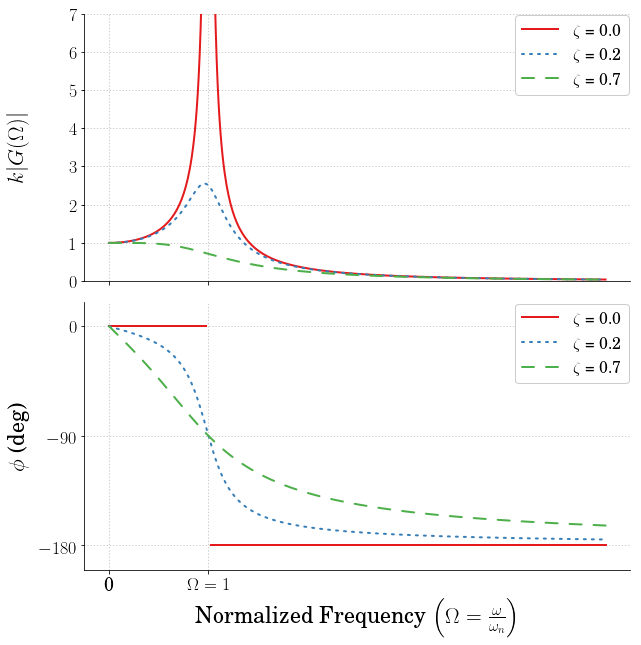

In [17]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.xticks([0,1],['0','$\Omega = 1$'])

# Magnitude plot
ax1.set_ylabel(r'$ k|G(\Omega)| $',family='serif',fontsize=22,weight='bold',labelpad=40)
ax1.plot(wun, k*mag_normal_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax1.plot(w, k*mag_normal_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax1.plot(w, k*mag_normal_0p7, linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.7')
ax1.set_ylim(0.0,7.0)
ax1.set_yticks([0,1,2,3,4,5],['0', '1'])

ax1.leg = ax1.legend(loc='upper right', fancybox=True)
ltext  = ax1.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
# ax2.plot(wnorm,TFnorm_phase*180/np.pi,linewidth=2)
ax2.plot(wun, phase_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax2.plot(w, phase_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax2.plot(w, phase_0p7, linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.7')
ax2.set_ylim(-200.0,20.0,)
ax2.set_yticks([0, -90, -180])

ax2.leg = ax2.legend(loc='upper right', fancybox=True)
ltext  = ax2.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
plt.savefig('MCHE485_Prob2f.pdf')

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

### Problem 3
The system in Figure 3 is a sketch of a wing flap of an airplane. It is connected to ground via a perfect, frictionless pin and torsional spring, $k_\theta$. This torsional spring actually represents a much more complex mechanism, so it is difficult to calculate its equivalent stiffness analytically. So, a spring of stiffness $k$ is attached to the end of the flap at a distance $a$ from its pivot and used to excite it via input $y(t)$. You can ignore any gravitational effects and assume that the torsional spring is at its equilibrium when $\theta = 0$. The system's moment of inertia about the pivot point is $I_O$.

<ol style="list-style-type: lower-alpha;">
    <li> Write the linearized equations of motion for this system.</li>
    <li> What is the natural frequency?</li>
    <li> Assuming $y(t) = \bar{y}\sin{\omega t}$, write the time response of the angle of the flap, $\theta(t)$.</li>
    <li> Sketch the approximate frequency response of this system (both magnitude and phase) for $\zeta = 0.0$, $\zeta = 0.2$, and $\zeta = 0.7$. For each damping ratio, be sure to indicate:
        <ol style="list-style-type: lower-roman; margin-top:-2px">
            <li> Amplitude and phase as $\omega$ approaches 0.</li>
            <li> Amplitude and phase as $\omega$ approaches infinity.</li>
            <li> Amplitude and phase when $\omega$ equals the natural frequency of the system, $\omega_n$.</li>
        </ol></li>
    <li> From the experimental trials, the peak of the frequency response was found to occur at $\omega_r$. Assuming the natural frequency of the flap itself has the form $\frac{k_\theta}{I_O}$, write its value in terms of $\omega_r$, $k$, $a$, and $I_O$.</li>
</ol>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/wing_flap.png" alt="A Wing Flap on a Harmonic Excitation Test Stand" width=35%><br>
    <strong>Figure 3: A Wing Flap on a Harmonic Excitation Test Stand</strong>
</p>

#### Part d

In [18]:
# Set up input parameters
wun = np.linspace(0,5,500)          # Frequency range for freq response plot, 0-4 Omega with 500 points in-between
w = np.linspace(0,5,500)            # Frequency range for freq response plot, 0-4 Omega with 500 points in-between

# Define the normalized transfer function for several different damping ratios
z = 0.0;
mag_normal_un = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_un = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

# Let's mask the discontinuity in the undamped phase response
# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(1-w) <= 1e-2)
phase_un[pos] = np.nan

z = 0.2;
mag_normal_0p2 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p2 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

z = 0.7;
mag_normal_0p7 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p7 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

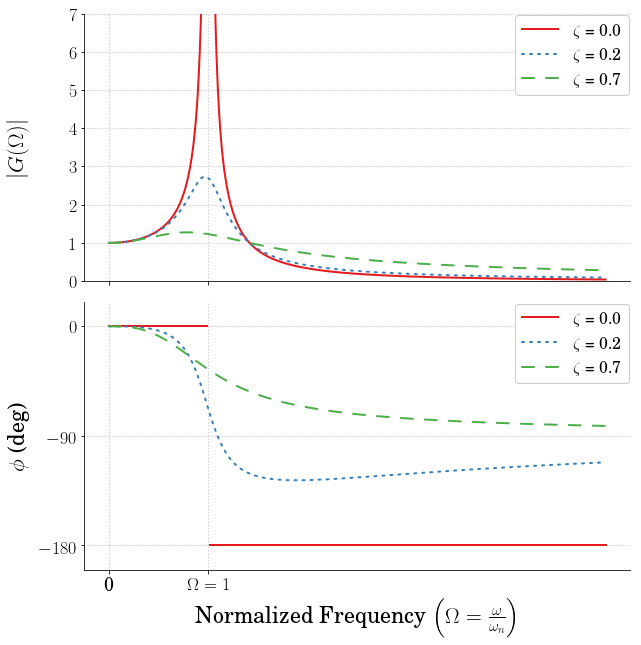

In [19]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $\left(\Omega = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.xticks([0,1],['0','$\Omega = 1$'])

# Magnitude plot
ax1.set_ylabel(r'$ |G(\Omega)| $',family='serif',fontsize=22,weight='bold',labelpad=40)
ax1.plot(wun, mag_normal_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax1.plot(w, mag_normal_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax1.plot(w, mag_normal_0p7, linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.7')
ax1.set_ylim(0.0,7.0)
ax1.set_yticks([0,1,2,3,4,5],['0', '1'])

ax1.leg = ax1.legend(loc='upper right', fancybox=True)
ltext  = ax1.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel(r'$ \phi $ (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
# ax2.plot(wnorm,TFnorm_phase*180/np.pi,linewidth=2)
ax2.plot(wun, phase_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax2.plot(w, phase_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax2.plot(w, phase_0p7, linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.7')
ax2.set_ylim(-200.0,20.0,)
ax2.set_yticks([0, -90, -180])

ax2.leg = ax2.legend(loc='upper right', fancybox=True)
ltext  = ax2.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
plt.savefig('MCHE485_Prob3d.pdf')

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [20]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))